In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math



In [2]:
#TODO: GUI, print acutal date to plot

In [5]:
def manualmode():
    stocknumber = 'placeholder'
    stocknumber = input('How many positions do you have in your Portfolio? ')
    stocknumber=int(stocknumber)
    stocknames = []
    stockvalues = []
    stockshares = []

    for stock in range(stocknumber):
        stocknames.append(input('Please fill in the Name of Position Nr. {}: '.format(stock+1)))
        stockvalues.append(float(input('Please fill in the actual Value per stock of Position Nr. {}: '.format(stock+1))))
        stockshares.append(float(input('How many shares do you own of Position Nr. {}: '.format(stock+1))))
    
    df = pd.DataFrame(list(zip(stocknames, stockvalues, stockshares)), columns=['Stock', 'Value', 'Shares'])
    df['TotalValue'] = df['Value'] * df['Shares']
    df.sort_values("TotalValue", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')
    return df

def automaticmode():
    df = pd.read_csv('depot.csv', encoding = 'utf-8')
    cols = [2,4,6,7,8,9,10,12,13,14,15,16,18,20,22,24,25]
    df.drop(df.columns[cols],axis=1,inplace=True)
    return df
    return 0

def plot(df):
    
    labels = df['Stock']
   # labellist = list(labels)
    numbers = df['TotalValue']
    y_pos = np.arange(len(labels))
    # Plot
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_ylabel('Absolute Value')
    ax2 = fig.add_subplot(1,2,2)
    ax1.bar(y_pos, numbers, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
    ax1.set_xticks(y_pos)
    ax1.set_xticklabels(labels)
    ax2.pie(numbers, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    ax2.text(0.85, 0.95, 'DATUM', transform=ax2.transAxes, fontsize=14, verticalalignment='top')
    plt.tight_layout()
    fig.show()

Welcome to the Portfolio Plotter!
Type 0 for manual submitting stock information or 1 for reading in a csv file: 0
How many positions do you have in your Portfolio? 3
Please fill in the Name of Position Nr. 1: jo
Please fill in the actual Value per stock of Position Nr. 1: 100
How many shares do you own of Position Nr. 1: 1
Please fill in the Name of Position Nr. 2: ap
Please fill in the actual Value per stock of Position Nr. 2: 50
How many shares do you own of Position Nr. 2: 1
Please fill in the Name of Position Nr. 3: nurp
Please fill in the actual Value per stock of Position Nr. 3: 20
How many shares do you own of Position Nr. 3: 2
  Stock  Value  Shares  TotalValue
2  nurp   20.0     2.0        40.0
1    ap   50.0     1.0        50.0
0    jo  100.0     1.0       100.0


C:\Users\Marco\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


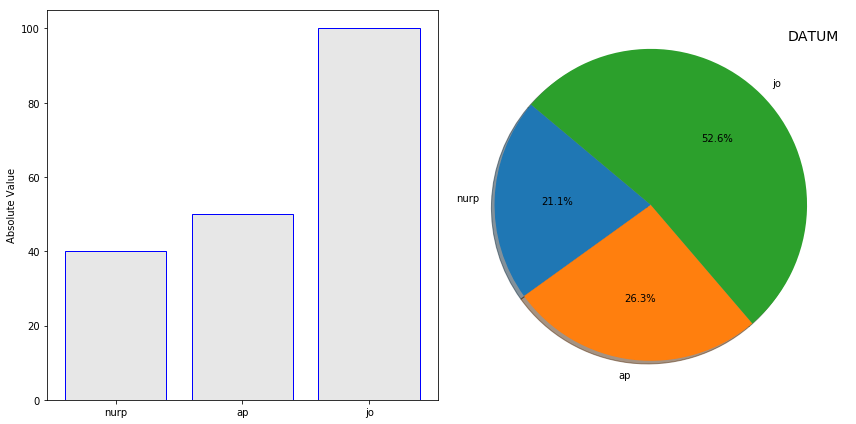

In [6]:
#lets start:

print('Welcome to the Portfolio Plotter!')
mode = 2 

while(mode!=0 and mode!=1):
    mode = int(input('Type 0 for manual submitting stock information or 1 for reading in a csv file: '))
    if (mode!=0 and mode!=1):
        print("You entered a false character, please try again! \n")

if mode == 0:
    df = manualmode()
    print(df)
    plot(df)